# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Два и более высших образования', 'Высшее', 'Ученая степень', 'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг', 'Информационные услуги', 'Энергетика', 'Здравоохранение', 'Недвижимость', 'Образование', 'Управляющая компания', 'Туризм', 'Сельское хозяйство', 'Юридические услуги/нотариальные услуги', 'Страхование', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Информационные технологии', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Сборочные производства', 'Государственная служба', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Торговля', 'Салоны красоты и здоровья', 'Логистика', 'Другие сферы', 'Строительство', 'Банк/Финансы', 'Транспорт'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
columns_with_pass_list = [] # сюда будем писать названия столбцов, в которых есть пропуски данных
for i in df.columns: # пробегаемся по всем столбцам
    if df[i].count() < int(df.shape[0]): # количество значений в столбце меньше чем  размерность таблицы по высоте
        columns_with_pass_list.append(i) # добавляем название столбца в лист
# выводим датафрейм с названиями столбцов с пропусками данных и добавляем в него значения из df_descr
pd.DataFrame(columns_with_pass_list, columns = ['ПОЛЕ']).merge(df_descr, how = 'left') 

# как видим, есть столбцы с пропусками данных
# на мой взгляд нужно заменить числовыми идентификаторами  от 1 до N значения в столбцах:
# GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, TP_PROVINCE, REGION_NM
# все nan интерпретировать как 0

# для колонок WORK_TIME и PREVIOUS_CARD_NUM_UTILIZED nan значения принять равными нулю.

,ПОЛЕ,ОПИСАНИЕ
0,GEN_INDUSTRY,отрасль работы клиента
1,GEN_TITLE,должность
2,ORG_TP_STATE,форма собственности компании
3,ORG_TP_FCAPITAL,отношение к иностранному капиталу
4,JOB_DIR,направление деятельности в нутри компании
5,TP_PROVINCE,"область торговой точки, где клиент брал послед..."
6,REGION_NM,регион РФ
7,WORK_TIME,время работы на текущем месте (в месяцах)
8,PREVIOUS_CARD_NUM_UTILIZED,количество уже утилизированных карт ( если пус...


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        
# Колонки с категориальными признаками есть смысл привести к кодировке каким-либо целым числом, 
# nan значения запишем как 0
# КРОМЕ колонок PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT - их мы сделаем числами

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
PERSONAL_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM
CREDIT
FST_PAYMENT
LOAN_AVG_DLQ_AMT
LOAN_MAX_DLQ_AMT
sample


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preproc_data(df_input):
    df_output = df_input.copy()    
    ## Your Code Here
    from sklearn.preprocessing import LabelEncoder
    pattern = '^(\-|\d)+(\,|\.?)+(\d*)+\s*'
    df_output = df_output.apply(lambda x: x.fillna(0) if x.dtype.kind in 'fO' else x.fillna('0'))
    #print('Заменила все nan на нули или на точки')
    try:  # Удаляло идентификатор AGREEMENT_RK
        df_output = df_output.drop('AGREEMENT_RK', axis = 1)
        #print('нашла и удалила AGREEMENT_RK')
    except KeyError:
        0
        #print('НЕ нашла и НЕ удалила AGREEMENT_RK')
    for i in df_output.columns:
        if df_output[i].name == 'sample': #чтобы не задвоить служебное поле
            0
            #print('СТОЛБЕЦ С ИМЕНЕМ sample НЕ трогаю')
        else: 
            #print(set(df_test_100[i]))
            #if df_output[i].dtype.kind not in 'fO':
            df_output[i] = df_output[i].astype(str)
            if len(df_output[df_output[i].str.contains(pattern) == True]) == len(df_output[i]):
                # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
                #print('Столбец {} распознала как ЧИСЛА, меняю , на .'.format(df_output[i].name))
                df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float') 
            else:
                # Кодировала категориальные признаки
                #print('Столбец {} считаю КАТЕГОРИАЛЬНЫМИ ПРИЗНАКАМИ, расставляю числительные категориальным признакам'.format(df_output[i].name))
                le = LabelEncoder()
                le.fit(df_output[i])
                df_output[i+'_le'] = le.transform(df_output[i])
    return df_output

In [18]:
%%time

df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

/Users/aleksandrpolakov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


CPU times: user 21.5 s, sys: 575 ms, total: 22.1 s
Wall time: 4.66 s


In [19]:
df_train_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,GEN_TITLE_le,ORG_TP_STATE_le,ORG_TP_FCAPITAL_le,JOB_DIR_le,FAMILY_INCOME_le,REG_ADDRESS_PROVINCE_le,FACT_ADDRESS_PROVINCE_le,POSTAL_ADDRESS_PROVINCE_le,TP_PROVINCE_le,REGION_NM_le
14910,0.0,49.0,1.0,0.0,1.0,2.0,1.0,Среднее специальное,Состою в браке,Торговля,...,7,5,1,3,1,47,47,47,41,4
14911,0.0,32.0,1.0,0.0,1.0,3.0,3.0,Среднее,Состою в браке,Торговля,...,7,2,1,9,1,19,19,19,55,11
14912,0.0,52.0,1.0,0.0,1.0,4.0,0.0,Неполное среднее,Состою в браке,Информационные технологии,...,12,1,1,9,1,18,18,18,17,1
14913,0.0,39.0,1.0,0.0,1.0,1.0,1.0,Высшее,Состою в браке,Образование,...,10,1,1,9,2,53,53,53,47,11
14914,0.0,30.0,1.0,0.0,0.0,0.0,0.0,Среднее,Состою в браке,Государственная служба,...,12,1,1,9,1,19,19,19,55,11


In [20]:
df_train_preproc[df_train_preproc['TARGET'] == 1].shape # проверил, TARGET ли наш идентификатор отклика или нет

(1812, 64)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [21]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']
X_work = df_train_preproc.drop(['TARGET'], axis=1)
X_test_work = df_test_preproc.drop(['TARGET'], axis=1)

# Так как я не стал удалять категориальные признаки из df_train_preproc - 
# нам же нужно будет как-то восстанавливать что значило какое число
# напишем функцию, котрая будет столбцы класса object

In [22]:
def clear_object_type (df_input):
    df_output = df_input.copy()
    for i in df_output.select_dtypes(include = 'object').columns:
        df_output = df_output.drop(i,axis = 1)
    return df_output
        

In [23]:
X = clear_object_type (X_work)
X_test = clear_object_type (X_test_work)

#### Задание 5. Обучение и оценка качества разных моделей

In [24]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here

# Я не понял, что мы получили в задании 4, поэтому все матрицы, которые мы получаем тут, я обозначил с индексом z5
X_train_z5, X_test_z5, y_train_z5, y_test_z5 = train_test_split(
  X, y, test_size=0.3, random_state=42)

/Users/aleksandrpolakov/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

model_DecisionTreeClassifier = DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train_z5, y_train_z5)
predict_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(X_test_z5)
predict_proba_DecisionTreeClassifier = model_DecisionTreeClassifier.predict_proba(X_test_z5)

print('Для "чёрного ящика" DecisionTreeClassifier precision', precision_score(y_test_z5, predict_DecisionTreeClassifier))
print('Для "чёрного ящика" DecisionTreeClassifier recall', recall_score(y_test_z5, predict_DecisionTreeClassifier))
print('Для "чёрного ящика" DecisionTreeClassifier accuracy', accuracy_score(y_test_z5, predict_DecisionTreeClassifier))
print('Для "чёрного ящика" DecisionTreeClassifier f1', f1_score(y_test_z5, predict_DecisionTreeClassifier))
print('Для "чёрного ящика" DecisionTreeClassifier predict_proba', predict_proba_DecisionTreeClassifier)

model_RandomForestClassifier = RandomForestClassifier()
model_RandomForestClassifier.fit(X_train_z5, y_train_z5)
predict_RandomForestClassifier = model_RandomForestClassifier.predict(X_test_z5)
predict_proba_RandomForestClassifier = model_RandomForestClassifier.predict_proba(X_test_z5)

print('Для "чёрного ящика" RandomForestClassifier precision', precision_score(y_test_z5, predict_RandomForestClassifier))
print('Для "чёрного ящика" RandomForestClassifier recall', recall_score(y_test_z5, predict_RandomForestClassifier))
print('Для "чёрного ящика" RandomForestClassifier accuracy', accuracy_score(y_test_z5, predict_RandomForestClassifier))
print('Для "чёрного ящика" RandomForestClassifier f1', f1_score(y_test_z5, predict_RandomForestClassifier))
print('Для "чёрного ящика" RandomForestClassifier predict_proba', predict_proba_RandomForestClassifier)

model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train_z5, y_train_z5)
predict_LogisticRegression = model_LogisticRegression.predict(X_test_z5)
predict_proba_LogisticRegression = model_LogisticRegression.predict_proba(X_test_z5)

print('Для "чёрного ящика" LogisticRegression precision', precision_score(y_test_z5, predict_LogisticRegression))
print('Для "чёрного ящика" LogisticRegression recall', recall_score(y_test_z5, predict_LogisticRegression))
print('Для "чёрного ящика" LogisticRegression accuracy', accuracy_score(y_test_z5, predict_LogisticRegression))
print('Для "чёрного ящика" LogisticRegression f1', f1_score(y_test_z5, predict_LogisticRegression))
print('Для "чёрного ящика" LogisticRegression predict_proba', predict_proba_LogisticRegression)


Для "чёрного ящика" DecisionTreeClassifier precision 0.15877862595419848
Для "чёрного ящика" DecisionTreeClassifier recall 0.1873873873873874
Для "чёрного ящика" DecisionTreeClassifier accuracy 0.780599956207576
Для "чёрного ящика" DecisionTreeClassifier f1 0.171900826446281
Для "чёрного ящика" DecisionTreeClassifier predict_proba [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Для "чёрного ящика" RandomForestClassifier precision 0.42105263157894735
Для "чёрного ящика" RandomForestClassifier recall 0.014414414414414415
Для "чёрного ящика" RandomForestClassifier accuracy 0.877819137289249
Для "чёрного ящика" RandomForestClassifier f1 0.02787456445993031
Для "чёрного ящика" RandomForestClassifier predict_proba [[0.9 0.1]
 [0.9 0.1]
 [0.6 0.4]
 ...
 [0.9 0.1]
 [0.8 0.2]
 [1.  0. ]]
Для "чёрного ящика" LogisticRegression precision 0.2222222222222222
Для "чёрного ящика" LogisticRegression recall 0.0036036036036036037
Для "чёрного ящика" LogisticRegression accuracy 0.877381213050

In [32]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

predict_DecisionTreeClassifier = model_DecisionTreeClassifier.predict(X_test_z5)

print('Для "чёрного ящика" DecisionTreeClassifier accuracy', accuracy_score(y_test_z5, predict_DecisionTreeClassifier))
print('Для "чёрного ящика" DecisionTreeClassifier precision', precision_score(y_test_z5, predict_DecisionTreeClassifier))
print('Для "чёрного ящика" DecisionTreeClassifier recall', recall_score(y_test_z5, predict_DecisionTreeClassifier))
print('='*30)

predict_RandomForestClassifier = model_RandomForestClassifier.predict(X_test_z5)

print('Для "чёрного ящика" RandomForestClassifier accuracy', accuracy_score(y_test_z5, predict_RandomForestClassifier))
print('Для "чёрного ящика" RandomForestClassifier precision', precision_score(y_test_z5, predict_RandomForestClassifier))
print('Для "чёрного ящика" RandomForestClassifier recall', recall_score(y_test_z5, predict_RandomForestClassifier))
print('='*30)

predict_LogisticRegression = model_LogisticRegression.predict(X_test_z5)

print('Для "чёрного ящика" LogisticRegression accuracy', accuracy_score(y_test_z5, predict_LogisticRegression))
print('Для "чёрного ящика" LogisticRegression precision', precision_score(y_test_z5, predict_LogisticRegression))
print('Для "чёрного ящика" LogisticRegression recall', recall_score(y_test_z5, predict_LogisticRegression))



Для "чёрного ящика" DecisionTreeClassifier accuracy 0.7854171228377491
Для "чёрного ящика" DecisionTreeClassifier precision 0.16108452950558214
Для "чёрного ящика" DecisionTreeClassifier recall 0.18198198198198198
Для "чёрного ящика" RandomForestClassifier accuracy 0.8734398948981826
Для "чёрного ящика" RandomForestClassifier precision 0.10344827586206896
Для "чёрного ящика" RandomForestClassifier recall 0.005405405405405406
Для "чёрного ящика" LogisticRegression accuracy 0.8773812130501423
Для "чёрного ящика" LogisticRegression precision 0.2222222222222222
Для "чёрного ящика" LogisticRegression recall 0.0036036036036036037


In [26]:
print(classification_report(y_test_z5, predict_RandomForestClassifier))

             precision    recall  f1-score   support

        0.0       0.88      1.00      0.93      4012
        1.0       0.42      0.01      0.03       555

avg / total       0.82      0.88      0.82      4567



In [27]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train_z5, y_train_z5)                               # обучаем модель
predict_LogisticRegression = model_LogisticRegression.predict(X_test_z5)                     # делаем предсказание
sum(abs(y_test_z5 - predict_LogisticRegression))

560.0

In [28]:
len(y_test_z5)

4567

           DecisionTreeClassifier  RandomForestClassifier  LogisticRegression
accuracy                 0.780600                0.877819            0.877381
precision                0.158779                0.421053            0.222222
recall                   0.187387                0.014414            0.003604


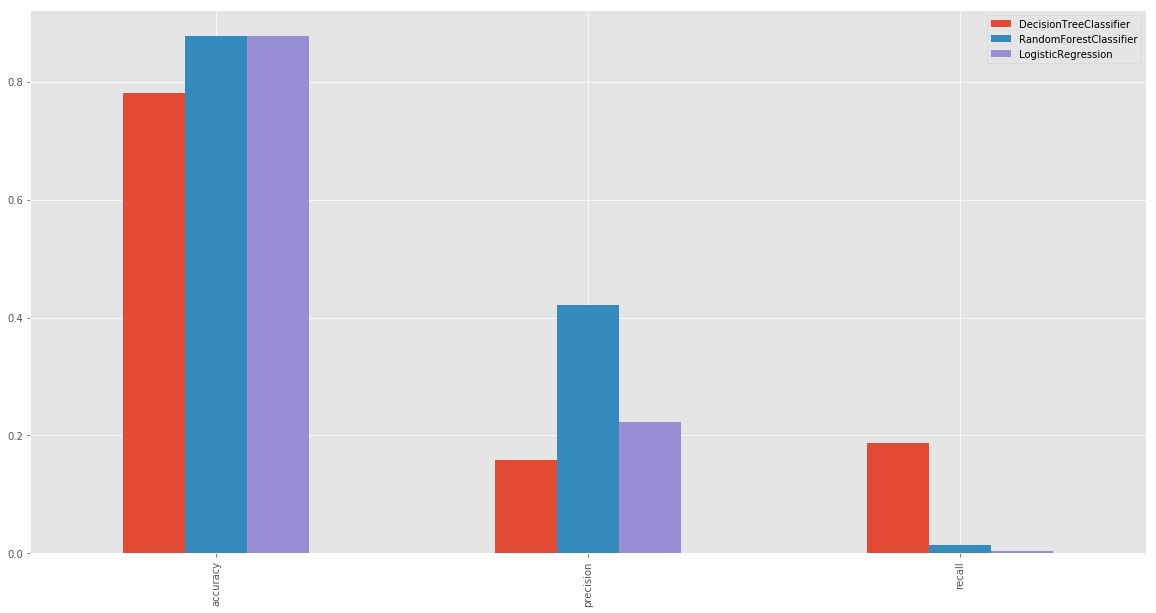

In [29]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

d = {'DecisionTreeClassifier':[accuracy_score(y_test_z5, predict_DecisionTreeClassifier),
                    precision_score(y_test_z5, predict_DecisionTreeClassifier),
                    recall_score(y_test_z5, predict_DecisionTreeClassifier)], 
    
    
    'RandomForestClassifier':[accuracy_score(y_test_z5, predict_RandomForestClassifier),
                    precision_score(y_test_z5, predict_RandomForestClassifier),
                    recall_score(y_test_z5, predict_RandomForestClassifier)], 
    
    'LogisticRegression':[accuracy_score(y_test_z5, predict_LogisticRegression),
                    precision_score(y_test_z5, predict_LogisticRegression),
                    recall_score(y_test_z5, predict_LogisticRegression)], 
    }

df = pd.DataFrame(data = d, index = ['accuracy','precision','recall'])
fig, ax = plt.subplots(figsize=(20,10))                 

df.plot(kind = 'bar', ax=ax)
print(df)

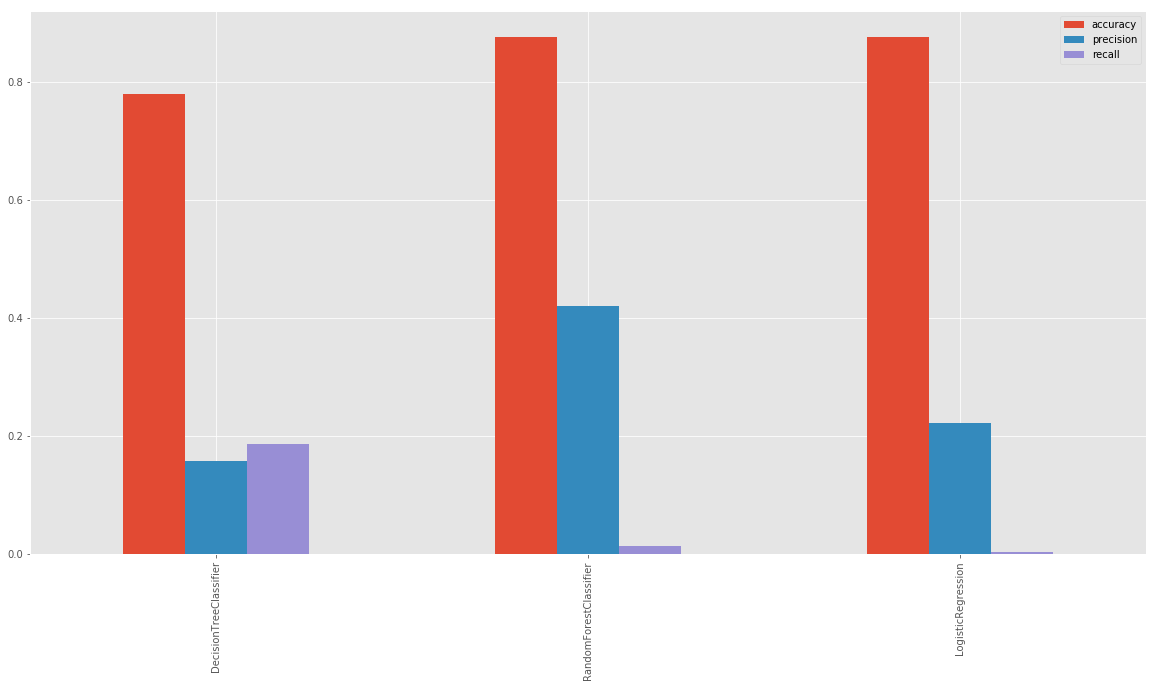

In [30]:
fig, ax = plt.subplots(figsize=(20,10))  
df.T.plot(kind = 'bar', ax=ax)

(-0.01, 1.01)

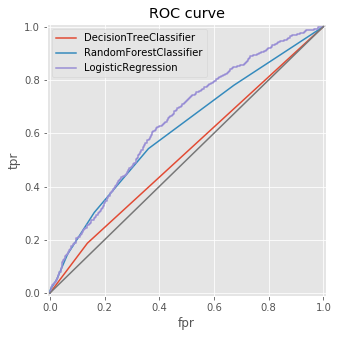

In [31]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_DecisionTreeClassifier, tpr_DecisionTreeClassifier, thresholds_DecisionTreeClassifier = roc_curve(y_test_z5, predict_proba_DecisionTreeClassifier[:,1])
fpr_RandomForestClassifier, tpr_RandomForestClassifier, thresholds_RandomForestClassifier = roc_curve(y_test_z5, predict_proba_RandomForestClassifier[:,1])
fpr_LogisticRegression, tpr_LogisticRegression, thresholds_LogisticRegression = roc_curve(y_test_z5, predict_proba_LogisticRegression[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_DecisionTreeClassifier, tpr_DecisionTreeClassifier, label = 'DecisionTreeClassifier')
plt.plot(fpr_RandomForestClassifier, tpr_RandomForestClassifier, label = 'RandomForestClassifier')
plt.plot(fpr_LogisticRegression, tpr_LogisticRegression, label = 'LogisticRegression')
plt.legend()
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [32]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here


rfc = DecisionTreeClassifier()
print('Средний roc_auc для DecisionTreeClassifier: {:.4f}'
              .format((cross_val_score(
                                        rfc,
                                        X,
                                        y,
                                        scoring='roc_auc',
                                        cv=10
                                    )
            .mean())))

rfc = RandomForestClassifier()
print('Средний roc_auc для RandomForestClassifier: {:.4f}'
              .format((cross_val_score(
                                        rfc,
                                        X,
                                        y,
                                        scoring='roc_auc',
                                        cv=10
                                    )
            .mean())))

rfc = LogisticRegression()
print('Средний roc_auc для LogisticRegression: {:.4f}'
              .format((cross_val_score(
                                        rfc,
                                        X,
                                        y,
                                        scoring='roc_auc',
                                        cv=10
                                    )
            .mean())))



Средний roc_auc для DecisionTreeClassifier: 0.5239
Средний roc_auc для RandomForestClassifier: 0.6017
Средний roc_auc для LogisticRegression: 0.6391


In [36]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here

model = LogisticRegression()
model.fit(X, y)
predict = model.predict(X_test)


print('Для "чёрного ящика" LogisticRegression accuracy', accuracy_score(y_test, predict))
print('Для "чёрного ящика" LogisticRegression precision', precision_score(y_test, predict))
print('Для "чёрного ящика" LogisticRegression recall', recall_score(y_test, predict))

Для "чёрного ящика" LogisticRegression accuracy 0.8819584171696848
Для "чёрного ящика" LogisticRegression precision 0.08333333333333333
Для "чёрного ящика" LogisticRegression recall 0.0005714285714285715


0.6367275293095962

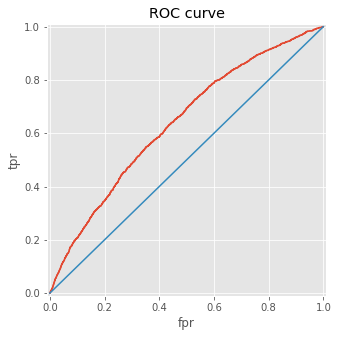

In [37]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
predict_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(
y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
roc_auc_score(y_test, predict_proba[:,1])

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)